In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")


___
Enter Team Member Names here (double click to edit):

- Name 1: Triston Hudgins
- Name 2: Shijo Joseph
- Name 3: Ousman Kanteh
- Name 4: Douglas Yip



________
<a id="top"></a>
# Live Session Assignment Two
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (.ipynb file, remember to save it!!) or HTML of the rendered notebook before the end of class.

## Contents
* <a href="#Loading">Loading the Classification Data</a>
* <a href="#using_trees">Using Decision Trees - Gini</a>
* <a href="#entropy">Using Decision Trees - Entropy</a>
* <a href="#multi">Multi-way Splits</a>
* <a href="#sklearn">Decision Trees in Scikit-Learn</a>

________________________________________________________________________________________________________
<a id="Loading"></a>
<a href="#top">Back to Top</a>
## Loading the Classification Data
Please run the following code to read in the "digits" dataset from sklearn's data loading module. This is identical to the first in class assignment for loading the data into matrices. `ds.data` is a matrix of feature values and `ds.target` is a column vector of the class output (in our case, the hand written digit we want to classify). Each class is a number (0 through 9) that we want to classify as one of ten hand written digits. 



In [2]:
from __future__ import print_function

In [3]:
from sklearn.datasets import load_digits
import numpy as np

ds = load_digits()

# this holds the continuous feature data
print('features shape:', ds.data.shape) # there are 1797 instances and 64 features per instance
print('target shape:', ds.target.shape )
print('range of target:', np.min(ds.target),np.max(ds.target))

features shape: (1797, 64)
target shape: (1797,)
range of target: 0 9


________________________________________________________________________________________________________
<a id="using_trees"></a>
<a href="#top">Back to Top</a>
## Using Decision Trees
In the videos, we talked about the splitting conditions for different attributes. Specifically, we discussed the number of ways in which it is possible to split a node, depending on the attribute types. To understand the possible splits, we need to understand the attributes. For the question below, you might find the description in the `ds['DESCR']` field to be useful. You can see the field using `print(ds['DESCR'])`

**Question 1:** For the digits dataset, what are the type(s) of the attributes? How many attributes are there? What do they represent?


#### Q1 Answer
What types of attributes? 8x8 images of interger pixels ranges 0 to 16.
How many attributes? 64
What do they represent? The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.


In [4]:
## Enter your comments here

print(ds['DESCR'])

## Enter comments here

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Text(0.5, 0.98, 'Label is 4')

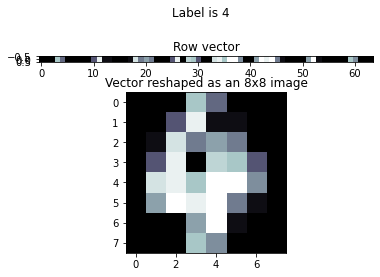

In [5]:

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
 
#get the vector data from a random position
idx = np.random.randint(0,len(ds.target))
raw_row = ds.data[idx] # as a vector
img = ds.data[idx].reshape((8,8)) #reshaped to be an image 
 
#custom plotting tools 
gs = gridspec.GridSpec(4,2)
 
plt.subplot(gs[0,:]) #show vector
plt.imshow(np.matrix(raw_row), cmap=plt.cm.bone, interpolation='nearest')
plt.title('Row vector')

plt.subplot(gs[1:,:]) #show image
plt.imshow(img, cmap=plt.cm.bone, interpolation='nearest')
plt.title('Vector reshaped as an 8x8 image')

plt.suptitle('Label is %d'%(ds.target[idx]))

___
## Using the gini coefficient
We talked about the gini index in the videos.  The gini coefficient for a **given split** is given by:
$$Gini=\sum_{t=1}^T \frac{n_t}{N}gini(t)$$
where $T$ is the total number of splits (2 for binary attributes), $n_t$ is the number of instances in node $t$ after splitting, and $N$ is the total number of instances in the parent node. $gini(t)$ is the **gini index for each individual node that is created by the split** and is given by:
$$gini(t)=1-\sum_{j=0}^{C-1} p(j|t)^2$$
where $C$ is the total number of possible classes and $p(j|t)$ is the probability of class $j$ in node $t$ (i.e., $n_j==$ the count of instances belonging to class $j$ in node $t$, normalized by the total number of instances in node $t$).
$$ p(j|t) = \frac{n_j}{n_t}$$ 

For the given dataset, $gini(t)$ has been programmed for you in the function `gini_index`. 

* `def gini_index(classes_in_split):`
 * To use the function, pass in a `numpy` array of the class labels for a node as (i.e., pass in the rows from `ds.target` that make up a node in the tree) and the gini will be returned for that node. 


In [6]:
# compute the gini of several examples for the starting dataset
# This function "gini_index" is written for you. Once you run this block, you 
#   will have access to the function for the notebook. You do not need to know 
#   how this function works--only what it returns 
# This function returns the gini index for an array of classes in a node.
def gini_index(classes_in_split):
    # pay no attention to this code in the function-- it just computes the gini for a given split 
    classes_in_split = np.reshape(classes_in_split,(len(classes_in_split),-1))
    unique_classes = np.unique(classes_in_split)
    gini = 1
    for c in unique_classes:
        gini -= (np.sum(classes_in_split==c) / float(len(classes_in_split)))**2
        
    return gini

In the example below, the function is used calculate the gini for splitting the dataset on feature 28, with value 2.5. In this example, we need to create two separate tree nodes: the first node has all the `ds.target` labels when feature 28 is greater than 2.5, the second node has all the rows from `ds.target` where feature 28 is less than 2.5. The steps are outlined below. **Read this carefully to understand what the code does below in the block following this.**
- Feature 28 is saved into a separate variable `feature28 = ds.data[:,28]`
- First all the target classes for the first node are calculated using `numpy` indexing `ds.target[feature28>2.5]` 
 - Note: this grabs all the rows in `ds.target` (the classes) which have feature 28 greater than 2.5 (similar to indexing in pandas)
- Second, those classes are passed into the function to get the gini for the right node in this split (i.e., feature 28 being greater than the threshold 2.5). 
 - `gini_r = gini_index(ds.target[feature28>2.5])`
- Third, the gini is calculated for the left node in the tree. This grabs only the rows in `ds.target` where feature 28 is less than 2.5.
     - `gini_l = gini_index(ds.target[feature28<=2.5])`
- Combining the gini indices is left as an exercise in the next section

In [7]:
#==========================Use the gini_index Example===============
# get the value for this feature as a column vector 
# (this is like grabbing one column of the record table)
feature28 = ds.data[:,28]

# if we split on the value of 2.5, then this is the gini for each resulting node:
gini_r = gini_index(ds.target[feature28>2.5]) # just like in pandas, we are sending in the rows where feature28>2.5
gini_l = gini_index(ds.target[feature28<=2.5]) # and sending the rows where feature28<=2.5

# compute gini example. This splits on attribute '28' with a value of 2.5
print('gini for right node of split:', gini_r)
print('gini for left node of split:', gini_l)

gini for right node of split: 0.8845857867667073
gini for left node of split: 0.7115407566535388


**Question 2:** Now, using the above values `gini_r` and `gini_l`. Calculate the combined Gini for the entire split. You will need to write the weighted summation (based upon the number of instances inside each node). To count the number of instances greater than a value using numpy, you can use broadcasting, which is a special way of indexing into a numpy array. For example, the code `some_array>5` will return a new numpy array of true/false elements. It is the same size as `some_array` and is marked true where the array is greater than `5`, and false otherwise. By taking the `sum` of this array, we can count how many times `some_array` is greater than `5`. 

`counts = sum(some_array>5)` 
 
You will need to use this syntax to count the values in each node as a result of splitting.  

#### Answer Q2.

In [8]:
counts_r = sum(ds.target[feature28>2.5])
print("Gini R:",counts_r)

counts_l = sum(ds.target[feature28<=2.5])
print("Gini L:",counts_l)

count_total = counts_l + counts_r

weight_prob = gini_r*counts_r/count_total + gini_l*counts_l/count_total
print("Total weighted Gini:",weight_prob)

Gini R: 6913
Gini L: 1157
Total weighted Gini: 0.859776232883072


In [9]:
feature28 = ds.data[:,28]
float(sum(feature28>2.5))


1398.0

In [10]:
## Enter your code here

# we need to make a weighted sum of the gini indices
num_instances_r = float(sum(feature28>2.5))
print(num_instances_r)
num_instances_l = float(sum(feature28<=2.5))
N = float(len(ds.target))

gini_total = (num_instances_r*gini_r + num_instances_l*gini_l) / N

## Enter your code here
print('The total gini of the split for a threshold of 2.5 is:',gini_total)


1398.0
The total gini of the split for a threshold of 2.5 is: 0.8461634345045179


___
## Start of Live Session Coding

**Question 3:** Now we want to know which is a better split:
- `feature28` split on a value of `2.5`  
- `feature28` split on a value of `10`.  

Enter your code to find the total gini of splitting on the threshold of 10 and compare it to the total gini of splitting on threshold of 2.5 (for feature 28 only). According to gini, which threshold is better for spliting on feature 28, `threshold=2.5` or `threshold=10.0`?

#### Answer Q3.

In [11]:
# Enter your code here
gini_r10 = gini_index(ds.target[feature28>10]) # just like in pandas, we are sending in the rows where feature28>2.5
gini_l10 = gini_index(ds.target[feature28<=10]) # and sending the rows where feature28<=2.5

counts_r10 = sum(ds.target[feature28>10])
print("Gini R10:",counts_r10)

counts_l10 = sum(ds.target[feature28<=10])
print("Gini L10:",counts_l10)

count_total10 = counts_l10 + counts_r10

weight_prob10 = gini_r10*counts_r10/count_total10 + gini_l10*counts_l10/count_total10

# Enter your code here
print("The total gini of the split for a threshold of 10 is:",weight_prob10)
print('This is not better than the split on 2.5')

Gini R10: 5132
Gini L10: 2938
The total gini of the split for a threshold of 10 is: 0.8649486932823309
This is not better than the split on 2.5


___
<a id="entropy"></a>
<a href="#top">Back to Top</a>
## Entropy based splitting
We discussed entropy as well in the video as another means of splitting. We calculated entropy for a node $t$ by:
$$ Entropy(t) = -\sum p(j|t) \log p(j|t) $$
where $p(j|t)$ is the same as above. To combine Entropy measures from a set of nodes, t = {1,...,T} we use: 
$$Entropy_{split}=\sum_{t=1}^T \frac{n_t}{N}Entropy(t)$$ 
where $n_t$ and $N$ are the same as defined above for the $Gini$. Information gain is calculated by subtracting the Entropy of the split from the Entropy of the parent node before splitting:
$$InfoGain = Entropy(p)-Entropy_{split}$$
where $p$ is the parent node before splitting. You are given an equation for calculating the $Entropy(t)$ of  node $t$. It works exactly like the `gini_index` function above, but is named `entropy_value` and returns the entropy for a node. You simply send in an array of the feature values for the node you want to calculate the entropy value for. 


In [12]:
def entropy_value(classes_in_split):
    # pay no attention to this code -- it just computes the gini for a given split 
    classes_in_split = np.reshape(classes_in_split,(len(classes_in_split),-1))
    unique_classes = np.unique(classes_in_split)
    ent = 0
    for c in unique_classes:
        p = (np.sum(classes_in_split==c) / float(len(classes_in_split)))
        ent += p * np.log(p)
        
    return -ent

In [13]:
ent_r = entropy_value(ds.target[feature28>2.5])
ent_l = entropy_value(ds.target[feature28<=2.5])

# compute entropy example. This splits on attribute '28' with a value of 2.5
print('entropy for right node of split:', ent_r)
print('entropy for left node of split:', ent_l)

entropy for right node of split: 2.1836975378213057
entropy for left node of split: 1.4898881412786364


___
**Question 4:** Calculate the **information gain** of the split when the threshold is 2.5 on `feature28`. What is the value of the information gain?

In [14]:
# Enter your code here
counts_r = sum(ds.target[feature28>2.5])
counts_l = sum(ds.target[feature28<=2.5])

count_total = counts_l + counts_r

# Enter your code here
weight_prob_ent = ent_r*counts_r/count_total + ent_l*counts_l/count_total
print(counts_r)
print(counts_l)
print("The information gain of the split for threshold of 2.5:",weight_prob_ent)

6913
1157
The information gain of the split for threshold of 2.5: 2.084225732145981


**Question 5:** What is the information gain if the threshold is 10.0 on `feature28`? According to information gain, is it better to split on a threshold of 2.5 or 10? Does entropy give the same decision as gini for this example?

In [15]:
# Enter your code here
ent_r10 = entropy_value(ds.target[feature28>10]) # just like in pandas, we are sending in the rows where feature28>2.5
ent_l10 = entropy_value(ds.target[feature28<=10]) # and sending the rows where feature28<=2.5

counts_r10 = sum(ds.target[feature28>10])
print("Ent R10:",counts_r10)

counts_l10 = sum(ds.target[feature28<=10])
print("Ent L10:",counts_l10)

count_total10 = counts_l10 + counts_r10

weight_prob10_ent = ent_r10*counts_r10/count_total10 + ent_l10*counts_l10/count_total10




# Enter your code here
print("Threshold of 2.5;", weight_prob_ent)
print("The information gain of the split for threshold of 10:",weight_prob10_ent)
print('This is better than the split on 2.5')
print('This is not the same as gini')

Ent R10: 5132
Ent L10: 2938
Threshold of 2.5; 2.084225732145981
The information gain of the split for threshold of 10: 2.095503492341547
This is better than the split on 2.5
This is not the same as gini


___
<a id="multi"></a>
<a href="#top">Back to Top</a>
## Information gain and multi-way splitting
Now assume that we can use not just a binary split, but a three way split. 

**Question 6** What is the information gain if we split feature28 on two thesholds (three separate nodes corresponding to three branches from one node) 
- node left: `feature28<2.5`, 
- node middle: `2.5<=feature28<10`, and 
- node right: `10<=feature28`? 

Is the information gain better? 

***Note***: You can index into a `numpy` array for the middle node with the following notation: `some_array[(2.5<=feature28) & (feature28<10.0)]`

In [16]:
# Enter your code here
ent_left = entropy_value(ds.target[feature28<=2.5])
ent_middle = entropy_value(ds.target[(2.5<=feature28) & (feature28<10.0)])
ent_right = entropy_value(ds.target[feature28>=10])

count_left = sum(ds.target[feature28<=2.5])
count_middle = sum(ds.target[(2.5<=feature28) & (feature28<10.0)])
count_right = sum(ds.target[feature28>=10])
count_all = count_left + count_middle + count_right



# Enter your code here
gain = ent_left*(count_left/count_all) + ent_middle*(count_middle/count_all) + ent_right*(count_right/count_all)
print('Entropy and count of left:',ent_left,count_left)
print('Entropy and count of middle:',ent_middle,count_middle)
print('Entropy and count of right:',ent_right,count_right)
print('The information gain of the three way split is:',gain)

Entropy and count of left: 1.4898881412786364 1157
Entropy and count of middle: 2.1558341564612853 1503
Entropy and count of right: 2.118750287884169 5410
The information gain of the three way split is: 2.0354967006287543


**Question 7**: Should we normalize the quantity that we just calculated if we want to compare it to the information gain of a binary split? Why or Why not?

Answer Q7.

No because its one attribute and we are using the total N to weight the gain.


___
<a id="sklearn"></a>
<a href="#top">Back to Top</a>
## Decision Trees in scikit-learn
Scikit-learn also has an implementation of decision trees. Its available here:
- http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

**Question 8**: What algorithm does scikit-learn use for creating decision trees (i.e., ID3, C4.5, C5.0, CART, MARS, CHAID, etc.)? 

#### Answer Q8

Answer: CART


___
**Question 9**: Using the documentation, use scikit-learn to train a decision tree on the digits data. Calculate the accuracy on the training data. What is the accuracy? Did you expect the decision tree to have this kind of accuracy? Why or Why not?

accuracy: 1.0
I did/did not expect... {your answer here}


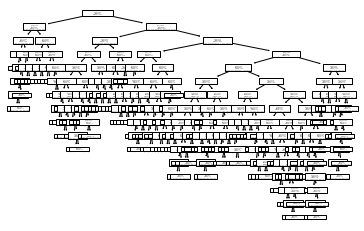

In [20]:
# use scikit learn to train a decision tree
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# enter your code below here to train and predict on the same data
dt_clf = DecisionTreeClassifier()
X, y = ds.data, ds.target
dt_clf = dt_clf.fit(X, y)


tree.plot_tree(dt_clf)
# enter your code above here

from sklearn.metrics import accuracy_score 

# enter your code below here to calculate accuracy

yhat = dt_clf.predict(X)
print('accuracy:', accuracy_score(y,yhat))
print('I did/did not expect... {your answer here}')
# enter your code above here


___
**Question 10**: Look at the other input parameters to the function `DecisionTreeClassifier` could any of them be used to help prevent the decision tree from overlearning on the data? 

Which variables might we use to control overfitting and how (explain why it might help to stop overfitting)?

In [18]:
# Enter your answer here



# Enter your answer here

________________________________________________________________________________________________________

That's all! Please **upload your rendered notebook** and please include **team member names** in the notebook submission. Also please remember to save the notebook before uploading.